<a href="https://colab.research.google.com/github/Laya-Shree/House_Price_Prediction/blob/main/USA_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
x = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']].values

y = data['Price'].values

In [ ]:
x

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [ ]:
x.shape

(5000, 5)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.9,random_state=1)

In [ ]:
ytrain

array([1574279.81397754, 1268964.79540154, 1765281.09322946, ...,
       1345962.95498853, 1270928.03436999, 1039107.32630562])

In [ ]:
##Feature:input Target:output so we never normalize output values.

In [ ]:
## Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
## Training the model
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
model.coef_  ## value of m for each x & y.

array([231052.34624718, 164060.77315205, 121506.11597043,   1519.02726051,
       150961.35185457])

In [ ]:
model.intercept_ ## value of c

1232647.820640769

In [ ]:
ypred = model.predict(xtest)
ypred

In [ ]:
df = pd.DataFrame()
df['Y_Actual'] = ytest
df['Y_pred'] = ypred
df

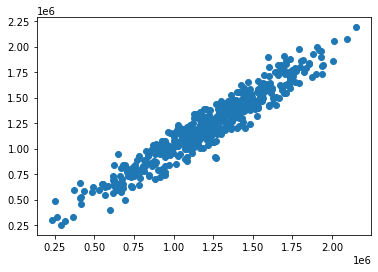

In [ ]:
plt.scatter(ytest,ypred)
plt.show()

In [ ]:
## R-Square / R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

0.9168251003129223

In [ ]:
## 91.6% so it is a good model.

In [ ]:
## testing a new sample
model.predict([[20,20000,10,5,50000]])[0]

10836359406.81108

In [ ]:
## When there is single feature then it is called Simple Linear Regression

In [ ]:
x1 = data[['Area Population']].values
y1 = data[['Price']].values

array([[23086.80050269],
       [40173.07217364],
       [36882.1593997 ],
       ...,
       [33266.14548965],
       [42625.62015585],
       [46501.28380314]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1,y1,train_size=0.9,random_state=1)

In [ ]:
model = LinearRegression()
model.fit(xtrain1,ytrain1)

LinearRegression()

In [ ]:
ypred1 = model.predict(xtest1)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest1, ypred1)
r2

0.19390161658021432

In [ ]:
## if u want to increase r-square value then use different test and sample data.

In [ ]:
accuracy = []
for i in range(10000):
  xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.9,random_state=i)
  model1 = LinearRegression()
  model1.fit(xtrain,ytrain)
  ypred - model1.predict(xtest)
  r2 = r2_score(ytest,ypred)
  accuracy.append(r2)

In [ ]:
np.max(accuracy)

0.9168251003129223

In [ ]:
np.argmax(accuracy)

1

In [ ]:
## Save the model
import joblib
joblib.dump(model,'house.pkl')

['house.pkl']

In [ ]:
## tset a new sample with saved model
mymodel = joblib.load("/content/house.pkl")